# 1. Reinforcement Learning

### 1. Reward function

To simplify the project, we will assume that the reward function is independent of the current state (s) and the action that you take at the current state (a). To be specific, reward function only depends on the state that you transition to (s′). With this simplification, we have $$R_{ss'}^a=R(s')$$ In this project, we will learn the optimal policy of an agent for two different reward functions:  
&nbsp;• Reward function 1  
&nbsp;• Reward function 2  
The two different reward functions are displayed in figures 6 and 7 respectively.

![reward function](./reward_function.png)

### Question 1

For visualization purpose, generate heat maps of Reward function 1 and Reward function 2. For the heat maps, make sure you display the coloring scale. You will have 2 plots for this question

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
reward_function1 = np.zeros((10, 10))
reward_function1[-1][-1] = 1.0
print(reward_function1)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [3]:
reward_function2 = np.zeros((10, 10))
reward_function2[-1][-1] = 10.0
reward_function2[1][4:7] = -100.0
reward_function2[2][4] = reward_function2[2][6] = -100.0
reward_function2[3][4] = reward_function2[3][6:9] = -100.0
reward_function2[4][4] = reward_function2[4][8] = -100.0
reward_function2[5][4] = reward_function2[5][8] = -100.0
reward_function2[6][4] = reward_function2[6][8] = -100.0
reward_function2[7][6:9] = -100.0
reward_function2[8][6] = -100.0
print(reward_function2)

[[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0. -100. -100. -100.    0.    0.    0.]
 [   0.    0.    0.    0. -100.    0. -100.    0.    0.    0.]
 [   0.    0.    0.    0. -100.    0. -100. -100. -100.    0.]
 [   0.    0.    0.    0. -100.    0.    0.    0. -100.    0.]
 [   0.    0.    0.    0. -100.    0.    0.    0. -100.    0.]
 [   0.    0.    0.    0. -100.    0.    0.    0. -100.    0.]
 [   0.    0.    0.    0.    0.    0. -100. -100. -100.    0.]
 [   0.    0.    0.    0.    0.    0. -100.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.   10.]]


Text(0.5, 1.0, 'heat map for reward function 1')

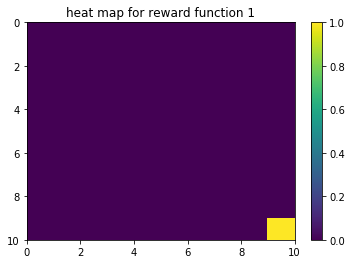

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.pcolor(reward_function1)
plt.gca().invert_yaxis()
plt.colorbar()
ax.set_title("heat map for reward function 1")

Text(0.5, 1.0, 'heat map for reward function 2')

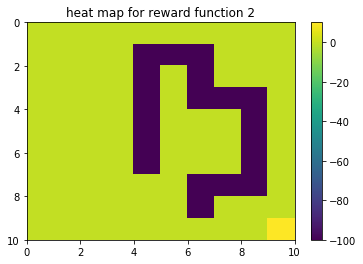

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.pcolor(reward_function2)
plt.gca().invert_yaxis()
plt.colorbar()
ax.set_title("heat map for reward function 2")

### 2. Optimal policy learning using RL algorithms

In this part of the project, we will use reinforcement learning (RL) algorithm to find the optimal policy. The main steps in RL algorithm are:  
&nbsp;• Find optimal state-value or action-value  
&nbsp;• Use the optimal state-value or action-value to determine the deterministic optimal policy  
There are a couple of RL algorithms, but we will use the Value iteration algo- rithm since it was discussed in detail in the lecture. We will skip the derivation of the algorithm here because it was covered in the lecture (for the derivation details please refer to the lecture slides on Reinforcement learning). We will just reproduce the algorithm below for the ease of implementation:

![value_iteration_algorithm](./value_iteration_algo.png)

### Question 2

Create the environment of the agent using the information provided in section 2. To be specific, create the MDP by setting up the state-space, action set, transition probabilities, discount factor, and reward function. For creating the environment, use the following set of parameters:

• Number of states = 100 (state space is a 10 by 10 square grid as displayed in figure 1)  
• Number of actions = 4 (set of possible actions is displayed in figure 2)  
• w = 0.1  
• Discount factor = 0.8  
• Reward function 1  

After you have created the environment, then write an optimal state-value function that takes as input the environment of the agent and outputs the optimal value of each state in the grid. For the optimal state-value function, you have to implement the Initialization (lines 2-4) and Estimation (lines 5-13) steps of the Value Iteration algorithm. For the estimation step, use ε = 0.01. For visualization purpose, you should generate a figure similar to that of figure 1 but with the number of state replaced by the optimal value of that state. In this question, you should have 1 plot.

In [38]:
num_states = 100
num_actions = 4
w = 0.1
gamma = 0.8
reward_function = reward_function1

In [46]:
def compute_max(row, col, num_actions, w, gamma, V, R):
    maximum = -1000000
    drow = [0, 0, -1, 1]
    dcol = [1, -1, 0, 0]
    for a in range(num_actions):       # iterate over each action, right, left, up, down
        summ = 0
        P = np.zeros((10, 10))
        for i in range(4):   # iterate over each s'
            rowp = row + drow[i]
            colp = col + dcol[i]
            
            if rowp < 0 or rowp > 9: # row out of bound, stay at current position
                rowp = row
            if colp < 0 or colp > 9: # column out of bound, stay at current position
                colp = col
            
            P[rowp][colp] = w / 4.0
            if i == a:
                P[rowp][colp] += 1 - w
              
            summ += P[rowp][colp] * (R[rowp][colp] + gamma * V[rowp][colp])
        
        if summ > maximum:
            maximum = summ
    
    return maximum

In [47]:
def optimal_state_value(num_states, num_actions, w, gamma, R):
    V = np.zeros((10, 10))
    
    delta = 1
    epsilon = 0.01
    while delta > epsilon:
        delta = 0
        for i in range(num_states):
            row = i // 10
            col = i % 10
            v = V[row][col]
            V[row][col] = compute_max(row, col, num_actions, w, gamma, V, R)
            delta = max(delta, abs(v - V[row][col]))
      
    return V

In [48]:
optimalV = optimal_state_value(num_states, num_actions, w, gamma, reward_function)
print(optimalV)

[[0.04179568 0.06283791 0.089742   0.12384898 0.16708096 0.22188288
  0.29135376 0.37942014 0.49098293 0.60964773]
 [0.06283791 0.08787011 0.12155728 0.16451357 0.21924607 0.28898976
  0.37787112 0.49106061 0.63321853 0.78735399]
 [0.089742   0.12155728 0.16438987 0.21913198 0.28890328 0.37782648
  0.49115592 0.63549019 0.81735527 1.01859718]
 [0.12384898 0.16451357 0.21913198 0.28889981 0.37782476 0.49115916
  0.6356006  0.81960951 1.05219113 1.31505855]
 [0.16708096 0.21924607 0.28890328 0.37782476 0.49115918 0.63560325
  0.81969511 1.05426506 1.35157155 1.69507283]
 [0.22188288 0.28898976 0.37782648 0.49115916 0.63560325 0.8196963
  1.05432164 1.35332408 1.73318006 2.18223115]
 [0.29135376 0.37787112 0.49115592 0.6356006  0.81969511 1.05432164
  1.35335083 1.73446085 2.21952677 2.80680236]
 [0.37942014 0.49106061 0.63549019 0.81960951 1.05426506 1.35332408
  1.73446085 2.22020148 2.839257   3.60762627]
 [0.49098293 0.63321853 0.81735527 1.05219113 1.35157155 1.73318006
  2.21952677 

Text(0.5, 1.0, 'heat map for optimal value using reward function 1')

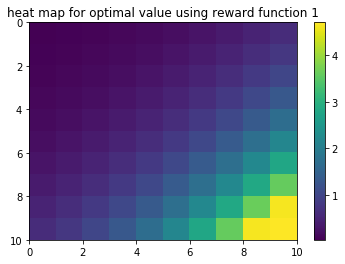

In [49]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.pcolor(optimalV)
plt.gca().invert_yaxis()
plt.colorbar()
ax.set_title("heat map for optimal value using reward function 1")